In [1]:
import numpy as np 
import pandas as pd
from collections import Counter 
import scipy
from scipy import stats
import matplotlib
from matplotlib import pyplot as plt
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm,t
import seaborn as sns
import pylab
from pylab import legend,plot,show,title,xlabel,ylabel
import os
import math

# Load CSV file

In [3]:
os.chdir(r"D:\advanced_analytics")

In [4]:
prev_df = pd.read_csv('previous_application.csv')

In [5]:
app_df = pd.read_csv('application_data.csv')

# Identifying the columns and null values (Previous Application Data)

In [7]:
prev_df.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [8]:
prev_df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [9]:
prev_df.NAME_CONTRACT_TYPE.value_counts()

NAME_CONTRACT_TYPE
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: count, dtype: int64

### Dropping irrelevant columns

In [11]:
df_filter = prev_df.drop(['RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED','NAME_TYPE_SUITE','AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL'],axis=1)

In [12]:
df_filter.isna().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
dtype: int64

In [13]:
df_filter.count()

SK_ID_PREV                     1670214
SK_ID_CURR                     1670214
NAME_CONTRACT_TYPE             1670214
AMT_ANNUITY                    1297979
AMT_APPLICATION                1670214
AMT_CREDIT                     1670213
AMT_GOODS_PRICE                1284699
WEEKDAY_APPR_PROCESS_START     1670214
HOUR_APPR_PROCESS_START        1670214
FLAG_LAST_APPL_PER_CONTRACT    1670214
NFLAG_LAST_APPL_IN_DAY         1670214
NAME_CASH_LOAN_PURPOSE         1670214
NAME_CONTRACT_STATUS           1670214
DAYS_DECISION                  1670214
NAME_PAYMENT_TYPE              1670214
CODE_REJECT_REASON             1670214
NAME_CLIENT_TYPE               1670214
NAME_GOODS_CATEGORY            1670214
NAME_PORTFOLIO                 1670214
NAME_PRODUCT_TYPE              1670214
CHANNEL_TYPE                   1670214
SELLERPLACE_AREA               1670214
NAME_SELLER_INDUSTRY           1670214
CNT_PAYMENT                    1297984
NAME_YIELD_GROUP               1670214
PRODUCT_COMBINATION      

In [14]:
df_filter.isna().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
dtype: int64

### Checking for the columns

In [16]:
prev_df[['SK_ID_CURR','AMT_CREDIT','AMT_APPLICATION','NAME_CONTRACT_STATUS','AMT_ANNUITY']].value_counts()

SK_ID_CURR  AMT_CREDIT  AMT_APPLICATION  NAME_CONTRACT_STATUS  AMT_ANNUITY
268608      225000.0    225000.0         Refused               11250.000      28
163394      388989.0    337500.0         Refused               79005.780      14
355545      45000.0     45000.0          Refused               2250.000       11
296583      45000.0     45000.0          Refused               2250.000       11
377310      67500.0     0.0              Refused               4500.000       10
                                                                              ..
219870      284400.0    225000.0         Approved              12880.485       1
            72549.0     75622.5          Approved              10925.865       1
            15705.0     15705.0          Approved              3229.245        1
219869      91341.0     91341.0          Unused offer          10374.525       1
456255      1271929.5   1170000.0        Approved              54022.140       1
Name: count, Length: 1276176, dtyp

### Removing annuity and application amount where their value is zero as if there is no application amount then the annuity will be zero

In [18]:
df_filter = df_filter.drop(np.where((prev_df.AMT_ANNUITY == 0) & (prev_df.AMT_APPLICATION ==0))[0])

In [19]:
df_filter.isna().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          0
AMT_GOODS_PRICE                385318
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
dtype: int64

### Similarly if the  credit and application amount is zero the bank would not even consider it so it is not required to keep such values

In [21]:
indices_to_drop = df_filter.index[(df_filter['AMT_APPLICATION'] == 0) & (df_filter['AMT_CREDIT'] == 0)]
df_filter = df_filter.drop(indices_to_drop)

### Replace missing values in 'AMT_ANNUITY' with the mean of that specific customer ('SK_ID_CURR')

In [23]:
df_filter['AMT_ANNUITY'] = df_filter.groupby('SK_ID_CURR')['AMT_ANNUITY'].transform(lambda x: x.fillna(x.mean()))

In [24]:
df_filter.isna().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
NAME_CONTRACT_TYPE                 0
AMT_ANNUITY                      272
AMT_APPLICATION                    0
AMT_CREDIT                         0
AMT_GOODS_PRICE                51463
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
FLAG_LAST_APPL_PER_CONTRACT        0
NFLAG_LAST_APPL_IN_DAY             0
NAME_CASH_LOAN_PURPOSE             0
NAME_CONTRACT_STATUS               0
DAYS_DECISION                      0
NAME_PAYMENT_TYPE                  0
CODE_REJECT_REASON                 0
NAME_CLIENT_TYPE                   0
NAME_GOODS_CATEGORY                0
NAME_PORTFOLIO                     0
NAME_PRODUCT_TYPE                  0
CHANNEL_TYPE                       0
SELLERPLACE_AREA                   0
NAME_SELLER_INDUSTRY               0
CNT_PAYMENT                    37085
NAME_YIELD_GROUP                   0
PRODUCT_COMBINATION                0
dtype: int64

### Still finding null values in annuity as zero so dropping them

In [26]:
df_filter.dropna(subset=['AMT_ANNUITY'],inplace=True)

In [27]:
df_filter.count()

SK_ID_PREV                     1333162
SK_ID_CURR                     1333162
NAME_CONTRACT_TYPE             1333162
AMT_ANNUITY                    1333162
AMT_APPLICATION                1333162
AMT_CREDIT                     1333162
AMT_GOODS_PRICE                1281699
WEEKDAY_APPR_PROCESS_START     1333162
HOUR_APPR_PROCESS_START        1333162
FLAG_LAST_APPL_PER_CONTRACT    1333162
NFLAG_LAST_APPL_IN_DAY         1333162
NAME_CASH_LOAN_PURPOSE         1333162
NAME_CONTRACT_STATUS           1333162
DAYS_DECISION                  1333162
NAME_PAYMENT_TYPE              1333162
CODE_REJECT_REASON             1333162
NAME_CLIENT_TYPE               1333162
NAME_GOODS_CATEGORY            1333162
NAME_PORTFOLIO                 1333162
NAME_PRODUCT_TYPE              1333162
CHANNEL_TYPE                   1333162
SELLERPLACE_AREA               1333162
NAME_SELLER_INDUSTRY           1333162
CNT_PAYMENT                    1296347
NAME_YIELD_GROUP               1333162
PRODUCT_COMBINATION      

In [28]:
df_filter.isna().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
NAME_CONTRACT_TYPE                 0
AMT_ANNUITY                        0
AMT_APPLICATION                    0
AMT_CREDIT                         0
AMT_GOODS_PRICE                51463
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
FLAG_LAST_APPL_PER_CONTRACT        0
NFLAG_LAST_APPL_IN_DAY             0
NAME_CASH_LOAN_PURPOSE             0
NAME_CONTRACT_STATUS               0
DAYS_DECISION                      0
NAME_PAYMENT_TYPE                  0
CODE_REJECT_REASON                 0
NAME_CLIENT_TYPE                   0
NAME_GOODS_CATEGORY                0
NAME_PORTFOLIO                     0
NAME_PRODUCT_TYPE                  0
CHANNEL_TYPE                       0
SELLERPLACE_AREA                   0
NAME_SELLER_INDUSTRY               0
CNT_PAYMENT                    36815
NAME_YIELD_GROUP                   0
PRODUCT_COMBINATION                0
dtype: int64

### Removing the null values in CNT_PAYMENT

In [30]:
df_filter.CNT_PAYMENT.value_counts()

CNT_PAYMENT
12.0    323038
6.0     190460
0.0     143404
10.0    141850
24.0    137757
18.0     77424
36.0     72580
60.0     53586
48.0     47304
8.0      30349
4.0      26924
30.0     16924
14.0      8252
42.0      7136
16.0      5710
5.0       3957
54.0      2104
20.0      1805
7.0       1434
9.0       1236
3.0       1100
15.0       904
11.0       669
72.0       139
13.0        51
17.0        48
84.0        45
22.0        37
23.0        27
26.0        13
35.0        11
66.0        10
28.0         8
29.0         8
32.0         6
19.0         6
34.0         4
59.0         4
41.0         3
47.0         3
45.0         3
21.0         3
44.0         2
39.0         2
46.0         2
38.0         2
33.0         1
40.0         1
53.0         1
Name: count, dtype: int64

In [31]:
np.mean(df_filter['CNT_PAYMENT'])

16.072840836596992

In [32]:
df_filter['CNT_PAYMENT']

0          12.0
1          36.0
2          12.0
3          12.0
4          24.0
           ... 
1670209    30.0
1670210    12.0
1670211    10.0
1670212    12.0
1670213    48.0
Name: CNT_PAYMENT, Length: 1333162, dtype: float64

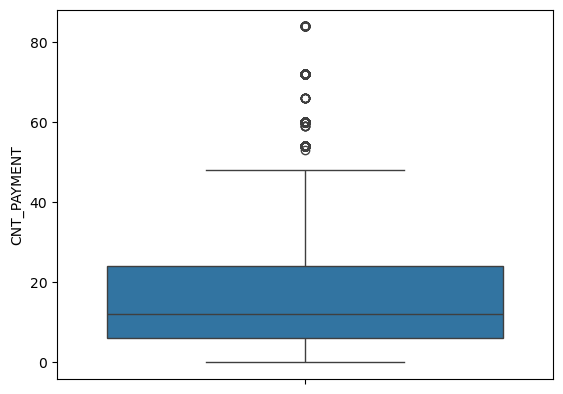

In [33]:
sns.boxplot(df_filter['CNT_PAYMENT'])
plt.show()

In [34]:
df_filter['CNT_PAYMENT'] = df_filter.groupby('SK_ID_CURR')['CNT_PAYMENT'].transform(lambda x: x.fillna(x.mean()))

In [35]:
df_filter['CNT_PAYMENT'].fillna(-1,inplace=True)

C:\Users\Anup\AppData\Local\Temp\ipykernel_9092\2141635822.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filter['CNT_PAYMENT'].fillna(-1,inplace=True)


### After Some calculations we found out that CNT_Payments can be replaced so we put it as -1 so we can catch them later

In [37]:
df_filter.isna().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
NAME_CONTRACT_TYPE                 0
AMT_ANNUITY                        0
AMT_APPLICATION                    0
AMT_CREDIT                         0
AMT_GOODS_PRICE                51463
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
FLAG_LAST_APPL_PER_CONTRACT        0
NFLAG_LAST_APPL_IN_DAY             0
NAME_CASH_LOAN_PURPOSE             0
NAME_CONTRACT_STATUS               0
DAYS_DECISION                      0
NAME_PAYMENT_TYPE                  0
CODE_REJECT_REASON                 0
NAME_CLIENT_TYPE                   0
NAME_GOODS_CATEGORY                0
NAME_PORTFOLIO                     0
NAME_PRODUCT_TYPE                  0
CHANNEL_TYPE                       0
SELLERPLACE_AREA                   0
NAME_SELLER_INDUSTRY               0
CNT_PAYMENT                        0
NAME_YIELD_GROUP                   0
PRODUCT_COMBINATION                0
dtype: int64

### Trying to clean AMT_GOODS_PRICE

In [39]:
df_filter[['AMT_GOODS_PRICE','AMT_APPLICATION']]

,AMT_GOODS_PRICE,AMT_APPLICATION
0,17145.0,17145.0
1,607500.0,607500.0
2,112500.0,112500.0
3,450000.0,450000.0
4,337500.0,337500.0
...,...,...
1670209,267295.5,267295.5
1670210,87750.0,87750.0
1670211,105237.0,105237.0
1670212,180000.0,180000.0


### Amount of goods price should be roughly equal to the application amount so we fill it with application amount

In [41]:
df_filter['AMT_GOODS_PRICE'] = prev_df['AMT_GOODS_PRICE'].fillna(df_filter['AMT_APPLICATION'])

In [42]:
df_filter.isna().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

### Removing Null values in Product combination and putting them as 'Unknown' as we cant replace such a large number with anything

In [44]:
df_filter.PRODUCT_COMBINATION.value_counts()

PRODUCT_COMBINATION
POS household with interest       263513
POS mobile with interest          220153
Cash X-Sell: middle               143860
Cash X-Sell: low                  130228
POS industry with interest         98814
POS household without interest     82908
Card X-Sell                        80547
Card Street                        62861
Cash Street: high                  59639
Cash X-Sell: high                  59299
Cash Street: middle                34653
Cash Street: low                   33830
POS mobile without interest        24082
POS other with interest            22890
POS industry without interest      12602
POS others without interest         2555
Cash                                 728
Name: count, dtype: int64

In [45]:
df_filter.PRODUCT_COMBINATION = df_filter['PRODUCT_COMBINATION'].fillna('UNKNOWN')

In [46]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1333162 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1333162 non-null  int64  
 1   SK_ID_CURR                   1333162 non-null  int64  
 2   NAME_CONTRACT_TYPE           1333162 non-null  object 
 3   AMT_ANNUITY                  1333162 non-null  float64
 4   AMT_APPLICATION              1333162 non-null  float64
 5   AMT_CREDIT                   1333162 non-null  float64
 6   AMT_GOODS_PRICE              1333162 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1333162 non-null  object 
 8   HOUR_APPR_PROCESS_START      1333162 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1333162 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1333162 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1333162 non-null  object 
 12  NAME_CONTRACT_STATUS         1333162 non-null  

In [47]:
df_filter.isna().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

In [48]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1333162 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1333162 non-null  int64  
 1   SK_ID_CURR                   1333162 non-null  int64  
 2   NAME_CONTRACT_TYPE           1333162 non-null  object 
 3   AMT_ANNUITY                  1333162 non-null  float64
 4   AMT_APPLICATION              1333162 non-null  float64
 5   AMT_CREDIT                   1333162 non-null  float64
 6   AMT_GOODS_PRICE              1333162 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1333162 non-null  object 
 8   HOUR_APPR_PROCESS_START      1333162 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1333162 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1333162 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1333162 non-null  object 
 12  NAME_CONTRACT_STATUS         1333162 non-null  

# Cleaning the Application Data Now

In [50]:
app_df.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [51]:
app_df.NAME_FAMILY_STATUS.value_counts()

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

In [52]:
app_df.NAME_HOUSING_TYPE.value_counts()

NAME_HOUSING_TYPE
House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: count, dtype: int64

In [53]:
app_df.REGION_RATING_CLIENT.value_counts()

REGION_RATING_CLIENT
2    226984
3     48330
1     32197
Name: count, dtype: int64

## Using the excel sheet of information found out that these columns are relevant.

In [56]:
cols = [
    "SK_ID_CURR",
    "TARGET",
    "NAME_CONTRACT_TYPE",
    "CODE_GENDER",
    "FLAG_OWN_CAR",
    "FLAG_OWN_REALTY",
    "AMT_INCOME_TOTAL",
    "NAME_INCOME_TYPE",
    "NAME_EDUCATION_TYPE",
    "NAME_FAMILY_STATUS",
    "NAME_HOUSING_TYPE",
    "REGION_POPULATION_RELATIVE",
    "DAYS_BIRTH",
    "OCCUPATION_TYPE",
    "REGION_RATING_CLIENT",
    "REGION_RATING_CLIENT_W_CITY",
    "WEEKDAY_APPR_PROCESS_START",
    "REG_REGION_NOT_LIVE_REGION",
    "REG_REGION_NOT_WORK_REGION",
    "LIVE_REGION_NOT_WORK_REGION",
    "REG_CITY_NOT_LIVE_CITY",
    "REG_CITY_NOT_WORK_CITY",
    "LIVE_CITY_NOT_WORK_CITY",
    "ORGANIZATION_TYPE"
]

app_filtred = app_df[cols]

In [58]:
app_filtred.isna().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
AMT_INCOME_TOTAL                   0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
OCCUPATION_TYPE                96391
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
REG_CITY_NOT_LIVE_CITY             0
REG_CITY_NOT_WORK_CITY             0
LIVE_CITY_NOT_WORK_CITY            0
ORGANIZATION_TYPE                  0
dtype: int64

## Filling the Occupation Type as "unknown" because we cant replace it by mean,median,modem

In [60]:
app_filtred['OCCUPATION_TYPE'].fillna('UNKNOWN',inplace=True)

C:\Users\Anup\AppData\Local\Temp\ipykernel_9092\351896903.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  app_filtred['OCCUPATION_TYPE'].fillna('UNKNOWN',inplace=True)
C:\Users\Anup\AppData\Local\Temp\ipykernel_9092\351896903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_filtred['OCCUPATION_TYPE'].fillna('UNKNOWN',inplace=True)


In [62]:
app_filtred.isna().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
AMT_INCOME_TOTAL               0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
OCCUPATION_TYPE                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
ORGANIZATION_TYPE              0
dtype: int64

# Merging the Data 

In [66]:
df_merged = pd.merge(df_filter, app_filtred, on='SK_ID_CURR', how='inner')

In [68]:
df_merged.isna().sum()

SK_ID_PREV                      0
SK_ID_CURR                      0
NAME_CONTRACT_TYPE_x            0
AMT_ANNUITY                     0
AMT_APPLICATION                 0
AMT_CREDIT                      0
AMT_GOODS_PRICE                 0
WEEKDAY_APPR_PROCESS_START_x    0
HOUR_APPR_PROCESS_START         0
FLAG_LAST_APPL_PER_CONTRACT     0
NFLAG_LAST_APPL_IN_DAY          0
NAME_CASH_LOAN_PURPOSE          0
NAME_CONTRACT_STATUS            0
DAYS_DECISION                   0
NAME_PAYMENT_TYPE               0
CODE_REJECT_REASON              0
NAME_CLIENT_TYPE                0
NAME_GOODS_CATEGORY             0
NAME_PORTFOLIO                  0
NAME_PRODUCT_TYPE               0
CHANNEL_TYPE                    0
SELLERPLACE_AREA                0
NAME_SELLER_INDUSTRY            0
CNT_PAYMENT                     0
NAME_YIELD_GROUP                0
PRODUCT_COMBINATION             0
TARGET                          0
NAME_CONTRACT_TYPE_y            0
CODE_GENDER                     0
FLAG_OWN_CAR  

In [70]:
df_merged['AGE'] = abs(df_merged['DAYS_BIRTH']//365)
df_merged = df_merged.drop(['DAYS_BIRTH'],axis=1)

### Defining function for categorizing AGE_GROUP (Young, Mid age and Senior)

In [73]:
def age_group(x):
    if (x < 40):
        return 'Young'
    elif (x >= 40 and x < 60):
        return 'Mid Age'
    else:
        return 'Senior'

df_merged['AGE_GROUP'] = df_merged['AGE'].apply(age_group)
df_merged.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,WEEKDAY_APPR_PROCESS_START_y,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AGE,AGE_GROUP
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,TUESDAY,0,1,1,0,0,0,Military,40,Mid Age
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,SUNDAY,0,0,0,0,0,0,Self-employed,59,Mid Age
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,TUESDAY,0,0,0,0,0,0,Postal,29,Young
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,TUESDAY,0,0,0,0,0,0,XNA,61,Senior
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,MONDAY,1,1,0,1,1,1,Security Ministries,28,Young


## Grouping Credit group into Three groups as high medium and low

In [76]:
def credit_group(x):
    if (x < 500000):
        return 'Low'
    elif (x >= 500000 and x < 750000):
        return 'Medium'
    else:
        return 'High'

In [78]:
df_merged['CREDIT_GROUP'] = df_merged['AMT_CREDIT'].apply(credit_group)
df_merged.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AGE,AGE_GROUP,CREDIT_GROUP
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,0,1,1,0,0,0,Military,40,Mid Age,Low
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,0,0,0,0,0,0,Self-employed,59,Mid Age,Medium
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,0,0,0,0,0,0,Postal,29,Young,Low
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,0,0,0,0,0,0,XNA,61,Senior,Low
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,1,1,0,1,1,1,Security Ministries,28,Young,Low


## Dividing Data in Target = 1 and Target = 0

## We create two different dataframe of target 1 and 0 for visualizations

In [81]:
df_1 = df_merged[df_merged['TARGET'] == 1]
df_1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AGE,AGE_GROUP,CREDIT_GROUP
17,1676258,433469,Cash loans,22242.825,247500.0,268083.0,247500.0,THURSDAY,14,Y,...,0,0,0,0,1,1,Self-employed,40,Mid Age,Low
33,1912041,253391,Cash loans,5294.430,45000.0,47970.0,45000.0,SUNDAY,17,Y,...,0,0,0,0,0,0,Trade: type 7,27,Young,Low
37,1760006,283527,Cash loans,14730.660,72000.0,72000.0,72000.0,WEDNESDAY,15,Y,...,0,0,0,0,0,0,Business Entity Type 2,36,Young,Low
56,2408628,320444,Cash loans,55973.295,1035000.0,1110141.0,1035000.0,FRIDAY,16,Y,...,0,0,0,0,0,0,Transport: type 4,38,Young,High
106,1382147,336630,Cash loans,10061.910,112500.0,127350.0,112500.0,MONDAY,13,Y,...,0,0,0,0,0,0,Self-employed,32,Young,Low


In [83]:
df_0 = df_merged[df_merged['TARGET'] == 0]
df_0.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AGE,AGE_GROUP,CREDIT_GROUP
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,0,1,1,0,0,0,Military,40,Mid Age,Low
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,0,0,0,0,0,0,Self-employed,59,Mid Age,Medium
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,0,0,0,0,0,0,Postal,29,Young,Low
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,0,0,0,0,0,0,XNA,61,Senior,Low
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,1,1,0,1,1,1,Security Ministries,28,Young,Low


# Data Visualizations

## Univariate analysis for Unordered categorical variables

C:\Users\Anup\AppData\Local\Temp\ipykernel_9092\1426059945.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
C:\Users\Anup\AppData\Local\Temp\ipykernel_9092\1426059945.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


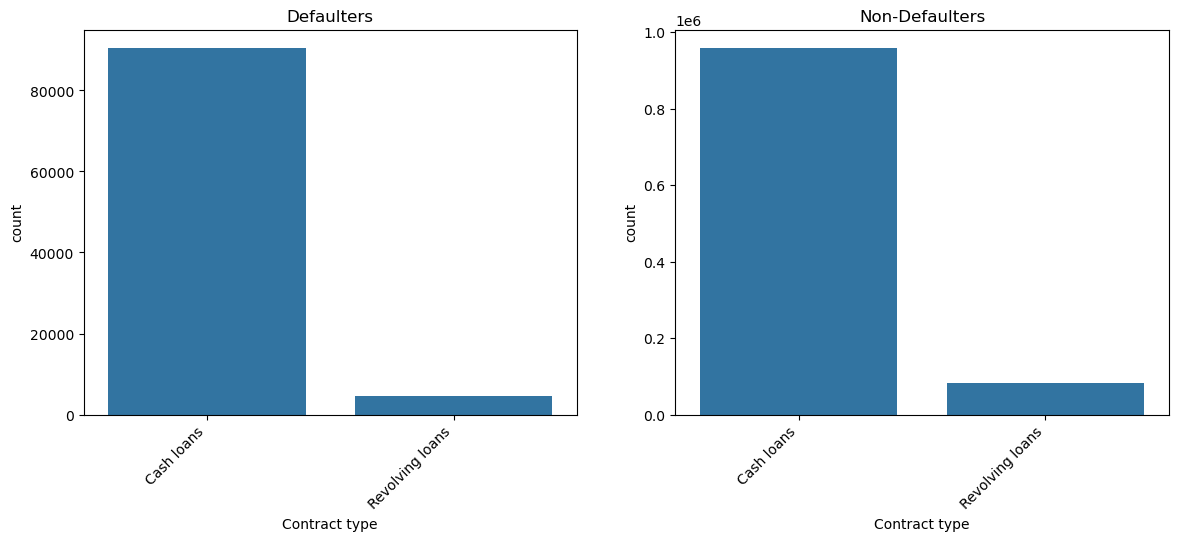

In [87]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_CONTRACT_TYPE_y',data=df_1)
plt.title('Defaulters')
ax.set(xlabel='Contract type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_CONTRACT_TYPE_y',data=df_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Contract type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

C:\Users\Anup\AppData\Local\Temp\ipykernel_9092\623418895.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
C:\Users\Anup\AppData\Local\Temp\ipykernel_9092\623418895.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


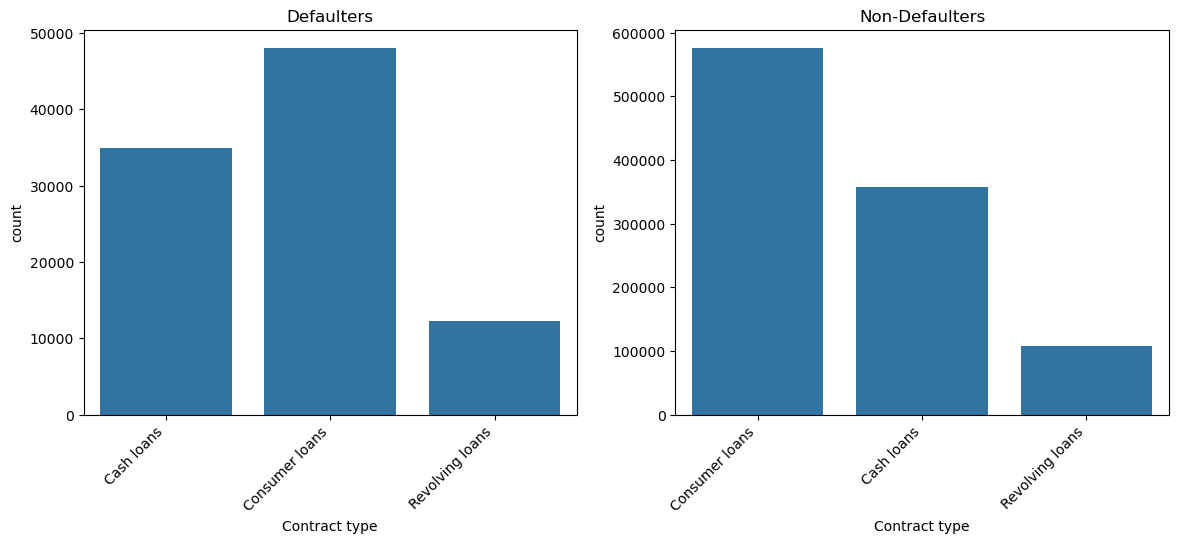

In [89]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_CONTRACT_TYPE_x',data=df_1)
plt.title('Defaulters')
ax.set(xlabel='Contract type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_CONTRACT_TYPE_x',data=df_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Contract type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

### Analysis
#### No relationship found between the Contract type and defaulters/non-defaulters
#### There are not any major difference.

[Text(0.5, 0, 'Gender')]

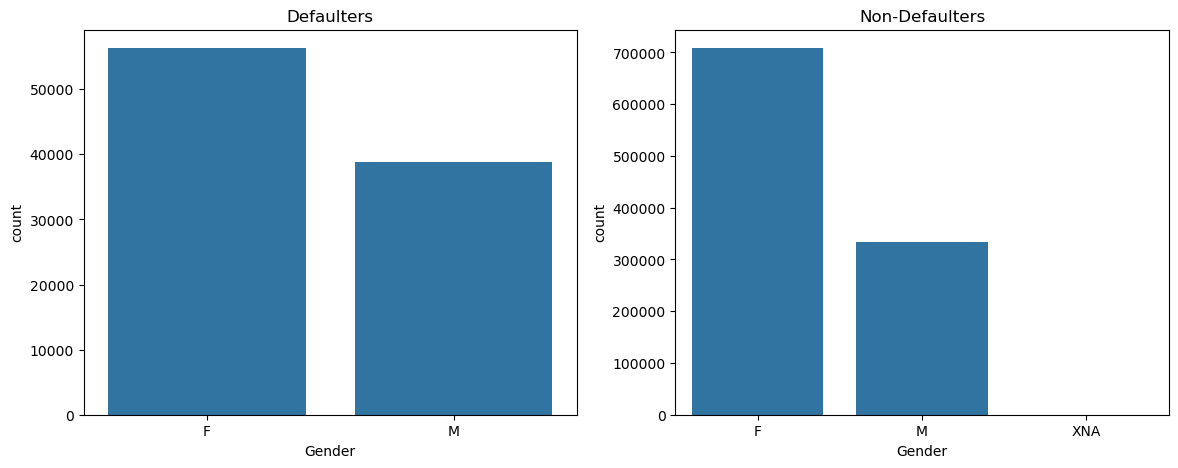

In [110]:
# Plotting two plots for delaulters and non defaulters on basis of gender
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'CODE_GENDER',data=df_1)
plt.title('Defaulters')
ax.set(xlabel='Gender')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'CODE_GENDER',data=df_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Gender')

##### Analysis
##### Defaluters - We can see that females are slightly more in number of defaulters than male.
##### Non-defaluters - The same pattern continues for non-defaluters as well. The females are more in number here than male.

## Defaulters and non-defaulters on the basis of Income type

C:\Users\Anup\AppData\Local\Temp\ipykernel_9092\3034550414.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
C:\Users\Anup\AppData\Local\Temp\ipykernel_9092\3034550414.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


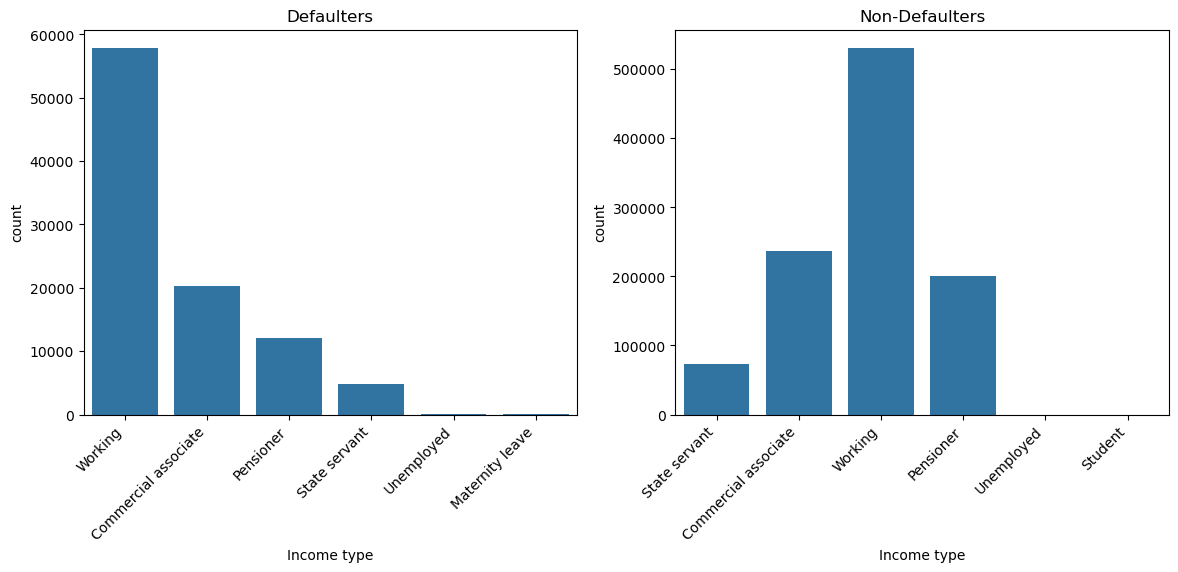

In [114]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_INCOME_TYPE',data=df_1)
plt.title('Defaulters')
ax.set(xlabel='Income type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_INCOME_TYPE',data=df_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Income type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

### Analysis
##### Defaulters - Working people are mostly defaulted as their numbers are high with compare to other pfrofessions.
##### Non-defaulters - Similarly here also working people are more in number who are not defaulted.

### Defaulters and non-defaulters on the basis of Education type

C:\Users\Anup\AppData\Local\Temp\ipykernel_9092\4182642423.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
C:\Users\Anup\AppData\Local\Temp\ipykernel_9092\4182642423.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


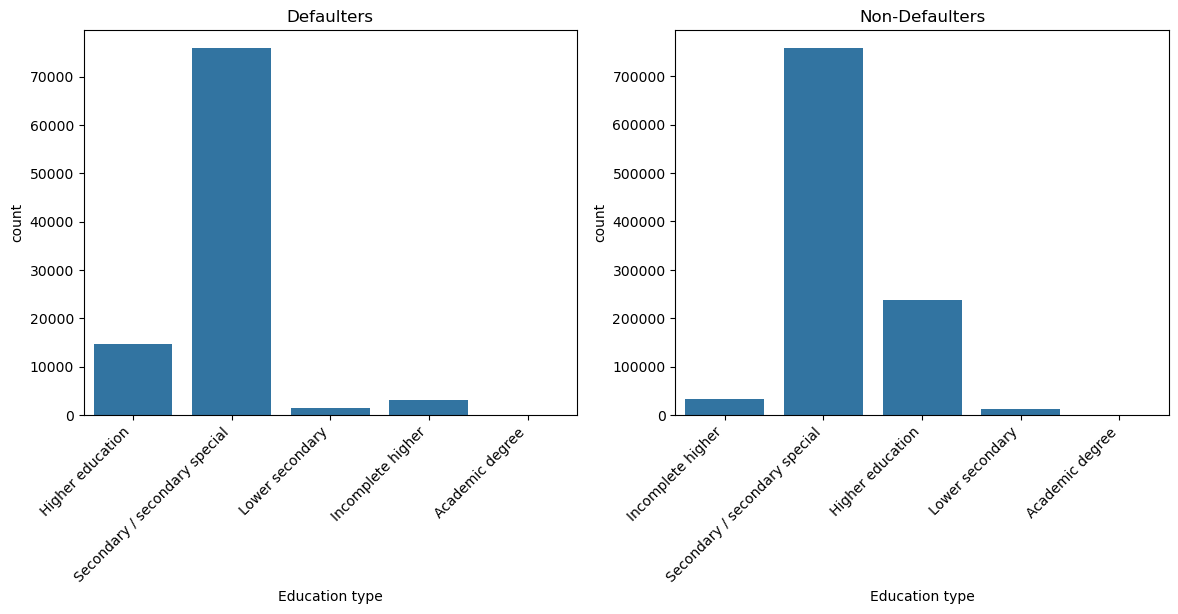

In [123]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_EDUCATION_TYPE',data=df_1)
plt.title('Defaulters')
ax.set(xlabel='Education type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_EDUCATION_TYPE',data=df_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Education type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

### Analysis
##### Defaulters - Education with Secondary/Secondary sepcial customers are more number in defaulters comapre with other level of eduacted poeple.
##### Non defaulters - Here also Secondary/Secondary sepcial are more in numbers.

### Defaulters and non-defaulters on the basis of Family status

C:\Users\Anup\AppData\Local\Temp\ipykernel_9092\76135921.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
C:\Users\Anup\AppData\Local\Temp\ipykernel_9092\76135921.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


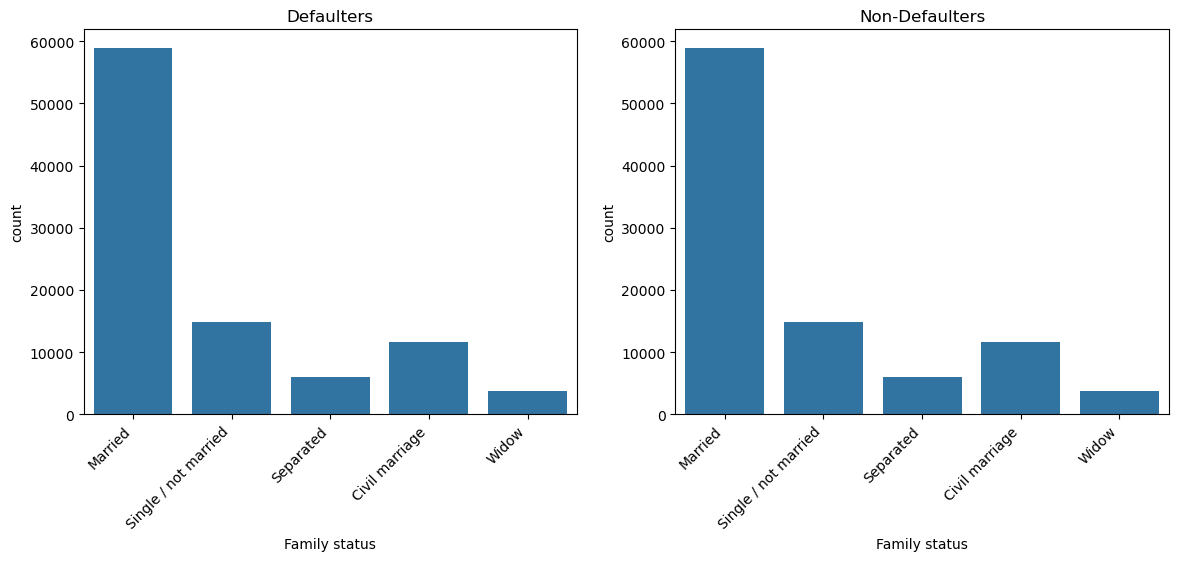

In [129]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_FAMILY_STATUS',data=df_1)
plt.title('Defaulters')
ax.set(xlabel='Family status')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_FAMILY_STATUS',data=df_1)
plt.title('Non-Defaulters')
ax.set(xlabel='Family status')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

### Analysis
##### For both the customers (defaulters and non-defaulters) married people are more in number comapred with single, separated, widow etc.

## Univariate analysis for continious variables

### Defaulters and non-defaulters on the basis of credit amount of the loan

C:\Users\Anup\AppData\Local\Temp\ipykernel_9092\4177648715.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1['AMT_CREDIT'],hist=False)
C:\Users\Anup\AppData\Local\Temp\ipykernel_9092\4177648715.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0['AMT_CREDIT'],hist=F

<Axes: title={'center': 'Non Defaulters'}, xlabel='AMT_CREDIT', ylabel='Density'>

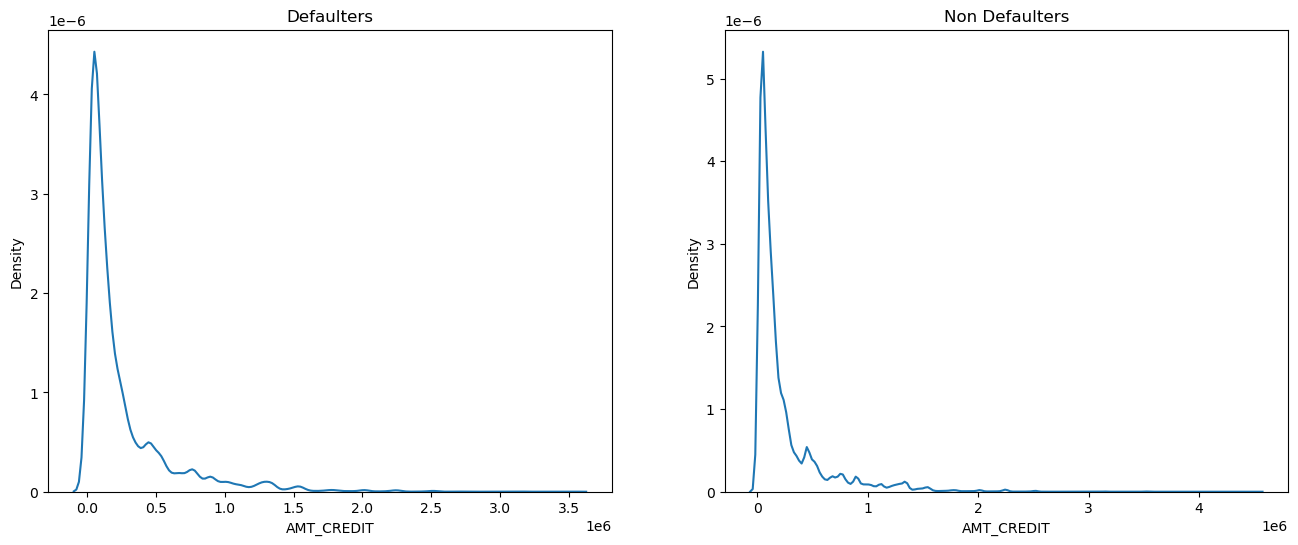

In [138]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
sns.distplot(df_1['AMT_CREDIT'],hist=False)

plt.subplot(1,2,2) 
plt.title('Non Defaulters')
sns.distplot(df_0['AMT_CREDIT'],hist=False)

#### Analysis
##### Defaulters - We can notice that the lesser the credit amount of the loan, the more chances of being defaulter. The spike is till 500000.
##### Non defaulters - If the credit amount is less, there is lesser chance of being defaulted. And gradually the chance is being decreased with the loan credit amount.

## Bivariate analysis

## Correlation between Defaulters

In [144]:
correlation = ['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE']

In [146]:
df_corr_target_1 = df_1[correlation]
df_corr_target_1.head()

,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE
17,268083.0,22242.825,247500.0,40
33,47970.0,5294.430,45000.0,27
37,72000.0,14730.660,72000.0,36
56,1110141.0,55973.295,1035000.0,38
106,127350.0,10061.910,112500.0,32


<Axes: >

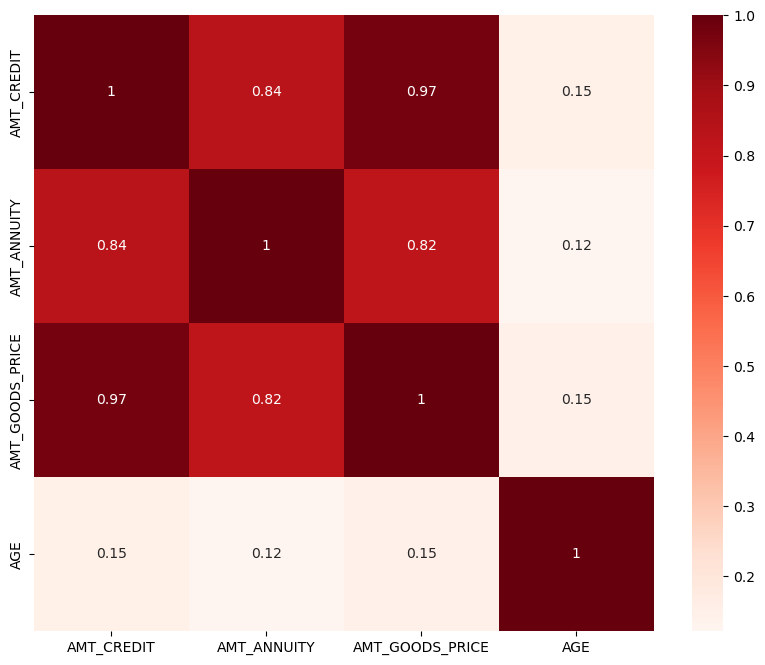

In [150]:
plt.figure(figsize=(10,8))
sns.heatmap(df_corr_target_1.corr(),cmap="Reds",annot=True)

#### Good Correlation found
##### AMT_CREDIT and AMT_ANNUITY (0.84)
##### AMT_CREDIT and AMT_GOODS_PRICE (0.97)
##### AMT_ANNUITY and AMT_GOODS_PRICE (0.82)

## Correlation between Non Defaulters

In [163]:
df_corr_target_0 = df_0[correlation]

<Axes: >

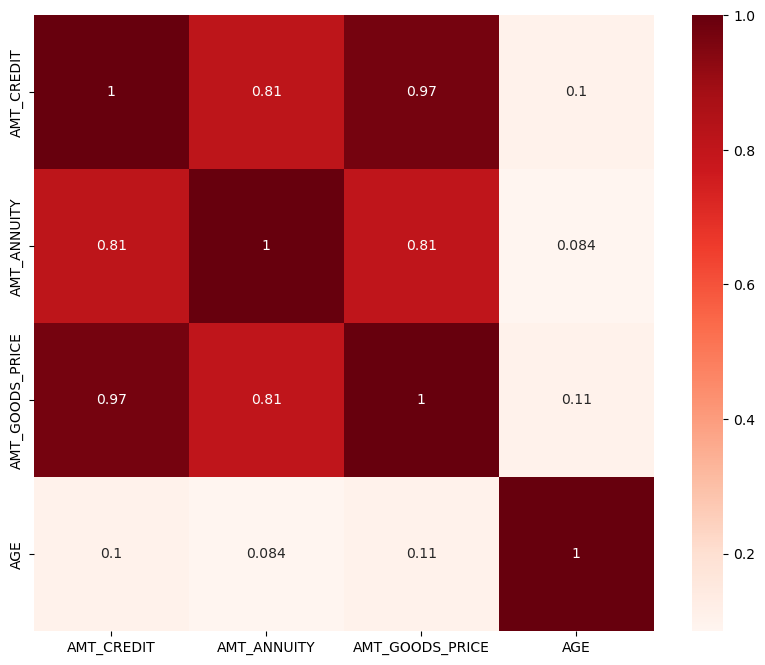

In [168]:
plt.figure(figsize=(10,8))
sns.heatmap(df_corr_target_0.corr(),cmap="Reds",annot=True)

##### Conclusion - We can see that for both defaulters and non defaulters the same pairs of columns are highly corelated.

## Anslysis of two segmented variables


### Status and Client type

<Axes: xlabel='NAME_CLIENT_TYPE', ylabel='count'>

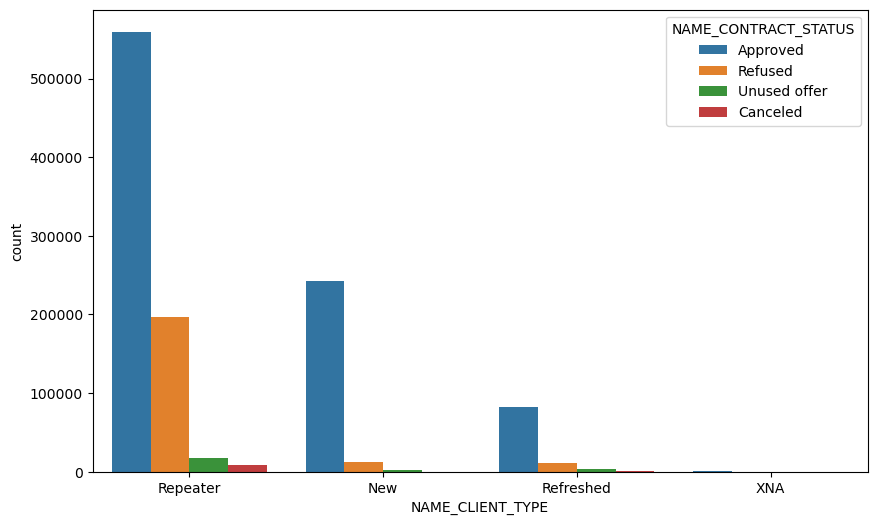

In [183]:
plt.figure(figsize=(10,6))

sns.countplot(x = 'NAME_CLIENT_TYPE' ,hue = 'NAME_CONTRACT_STATUS', data = df_merged )

#### Analysis
##### We see that the Repeater clients have more approved loans than New and Refreshed clients.

### Current loan defaulter status with respect to previous loan application status

Text(0, 0.5, 'Current defaulters')

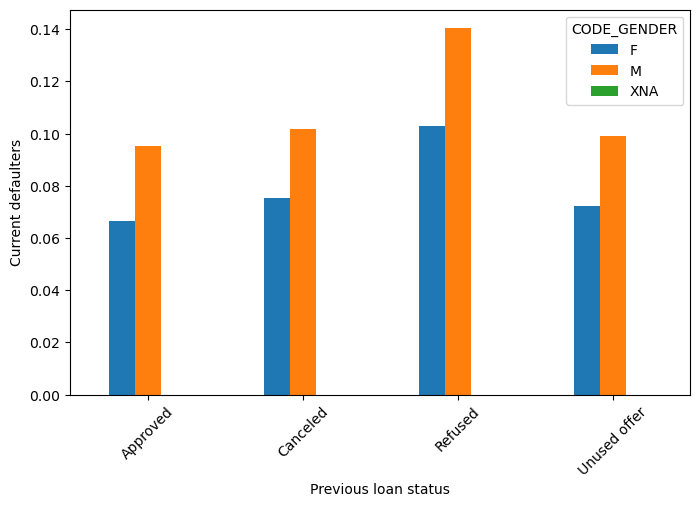

In [189]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

#### Analysis
##### We see that previously Refused client is more defaulted than previously Approved clients. Also, in all the cases the Males are more defaulted than Females.

### Current loan defaulter status with respect to previous loan application status and client types

Text(0, 0.5, 'Current defaulters')

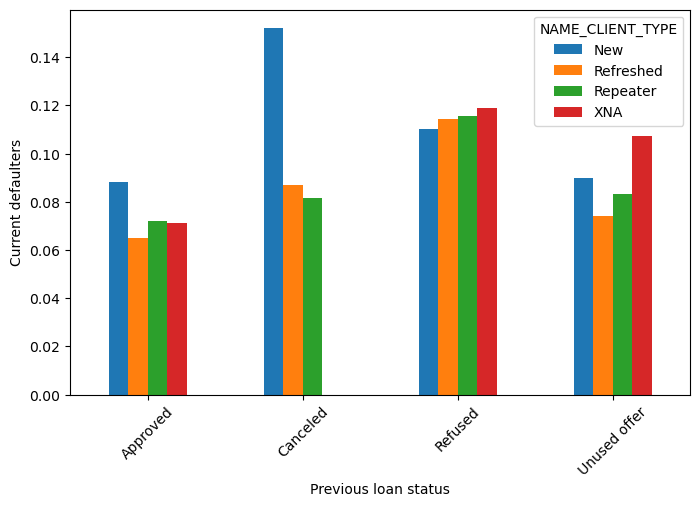

In [194]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_CLIENT_TYPE',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

#### Analysis
##### We can see that the Defaulters are more for previously Unused offers loan status clients, who were New.
##### For previously Approved status the New clients were more defaulted followed by Repeater.
##### For previously Refused applicants the Defaulters are more Refreshed clients.
##### For previously Canceled applicants the Defaulters are more New clients.

### Current loan defaulter status with respect to previous loan application status and age group


Text(0, 0.5, 'Current defaulters')

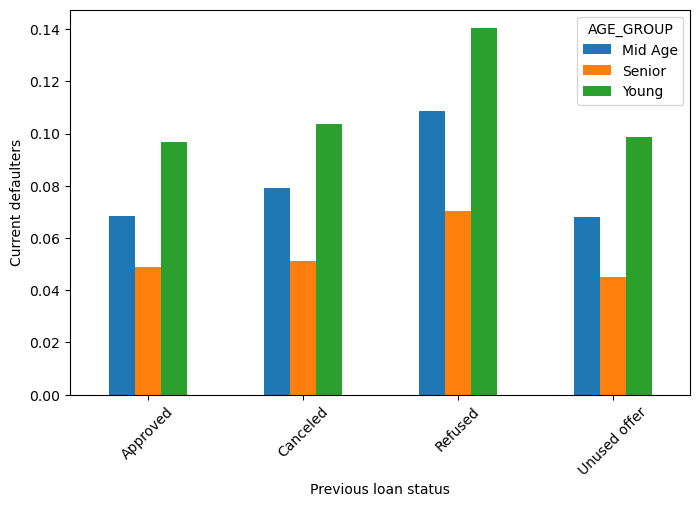

In [199]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

#### Analysis
##### For all the previous status Young applicants are more defaulted.
##### For all the previous status Senior applicants are less defaulted compared to others.

### Current loan defaulter status with respect to previous loan application status and portfolio of the loan

Text(0, 0.5, 'Current defaulters')

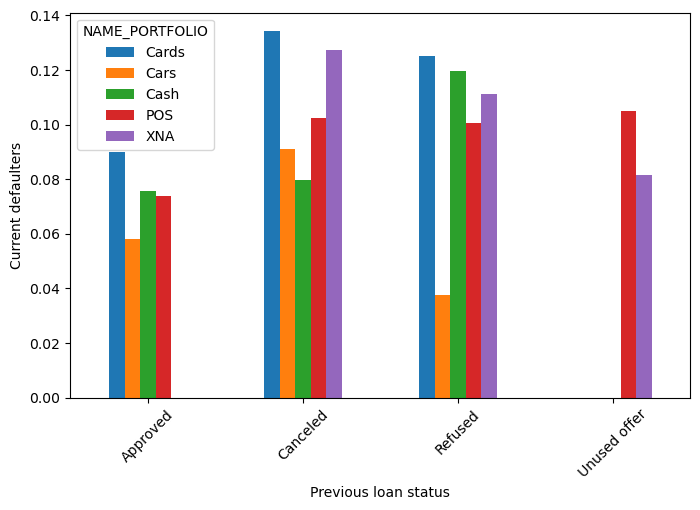

In [205]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_PORTFOLIO',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

#### Analysis
##### Most of the clients were defaulted, who previously applied loan for Cards.
##### For approved loan status the clients applied for Cars are less defaulted.
##### For Refused loan status the clients applied for POS are less defaulted.

# Conclsion

#### Highly Recommended Groups:

##### Clients with previously approved applications.
##### Highly educated individuals with higher income levels.
##### Married clients compared to others based on family status.
##### Females, as they are generally more favorable than males.



#### High-Risk Groups:

##### Clients who were previously refused, canceled, or did not use offers.
##### Low-income groups with a history of refusal.
##### Unemployed clients.
##### Young clients (considered riskier than middle-aged and senior clients).
##### Clients with lower or secondary education levels.